[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


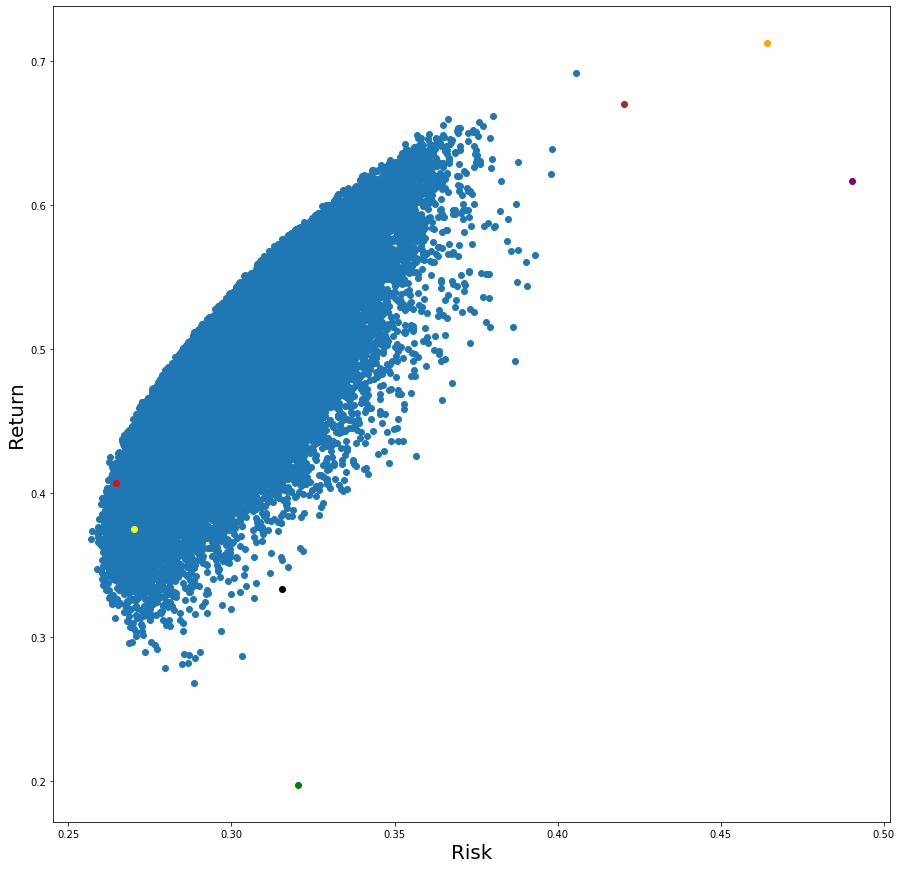

In [11]:
#Consdier ['COR','ARKK','VOO','REET','DOW','TSM'] only, eliminated ['2822.HK']

import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import scipy.optimize as solver
import datetime as dt
from functools import reduce

# Retrieve data from Yahoo
Closeprice = pd.DataFrame()
tickers = ['COR','ARKK','VOO','REET','DOW','TSM']
for i in tickers:
    # temp = web.DataReader(i, 'yahoo', '10/03/2006', dt.date.today())
    temp = yf.download(i, start='2020-03-10', end=dt.date.today(), interval='1d', auto_adjust=True)
    Closeprice[i] = temp['Close']
    

# Prepare necessary parameters
np.random.seed(1)
num_ports = 100000
all_weights = np.zeros((num_ports,6))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
log_ret = (Closeprice - Closeprice.shift(1))/Closeprice.shift(1)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(6))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    
    if ret_arr[x]>0.2 and vol_arr[x]<0.1816:
        print(vol_arr[x])
        print(weights)
    
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    return np.sum(weights)-1

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]


# Input current allocations of stock in your portfolio or set some points for testing if necessary. 
# You can adjust your allocations based on the result in order to optimize your portfolio.
weights_portfolio = np.array([0.2526578,0.00763334,0.3643938,0.15010887,0.00140325,0.22380294])
weightsCOR = np.array([1,0,0,0,0,0])
weightsARKK = np.array([0,1,0,0,0,0])
weightsVOO = np.array([0,0,1,0,0,0])
weightsREET = np.array([0,0,0,1,0,0])
weightsDOW = np.array([0,0,0,0,1,0])
weightsTSM = np.array([0,0,0,0,0,1])

b = np.sum( (log_ret.mean() * weights_portfolio * 252))
a = np.sqrt(np.dot(weights_portfolio.T, np.dot(log_ret.cov()*252, weights_portfolio)))

b1 = np.sum( (log_ret.mean() * weightsCOR * 252))
a1 = np.sqrt(np.dot(weightsCOR.T, np.dot(log_ret.cov()*252, weightsCOR)))

b2 = np.sum( (log_ret.mean() * weightsARKK * 252))
a2 = np.sqrt(np.dot(weightsARKK.T, np.dot(log_ret.cov()*252, weightsARKK)))

b3 = np.sum( (log_ret.mean() * weightsVOO * 252))
a3 = np.sqrt(np.dot(weightsVOO.T, np.dot(log_ret.cov()*252, weightsVOO)))

b5 = np.sum( (log_ret.mean() * weightsREET * 252))
a5 = np.sqrt(np.dot(weightsREET.T, np.dot(log_ret.cov()*252, weightsREET)))

b6 = np.sum( (log_ret.mean() * weightsDOW * 252))
a6 = np.sqrt(np.dot(weightsDOW.T, np.dot(log_ret.cov()*252, weightsDOW)))

b7 = np.sum( (log_ret.mean() * weightsTSM * 252))
a7 = np.sqrt(np.dot(weightsTSM.T, np.dot(log_ret.cov()*252, weightsTSM)))


# Plot graph
plt.figure(figsize=(15,15))
plt.scatter(vol_arr, ret_arr, cmap='plasma')


plt.scatter(a,b,color='red')
plt.scatter(a1,b1,color='black')
plt.scatter(a2,b2,color='orange')
plt.scatter(a3,b3,color='yellow')
plt.scatter(a5,b5,color='green')
plt.scatter(a6,b6,color='purple')
plt.scatter(a7,b7,color='brown')

plt.xlabel('Risk',fontsize=20)
plt.ylabel('Return',fontsize=20)
plt.show()

